<a href="https://colab.research.google.com/github/enricsanz-dxc/sesdpw2g4/blob/main/SE_SDP_(Wave_2)_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SE SDP Wave 2 . Group 4. Use Case

## Quantity prediction
### Time Series
You need to predict two metrics: ALLOCATION and CAPACITY (allocation = ordered quantity, capacity = consumed quantity)  
* An appropriate algorithm is the so called “Holt-Winters-Algorithm”  
* Use TYPE = 1 only, TYPE=2 is not relevant for this time series approach! “1” stands for “households”  
* All data are historical data reaching from 01 Jan 2017 – 02 June 2020. Data reaching from 03 June 2020 to 31 Dec 2020 are simply a guess taken by the NRG-4-U business department and must not be considered within your analysis
* As the business department is under high time pressure, they asked you to predict on the training set only (no test set required)
* Pls consider: if a station does not come with complete historical data it must be removed from the prediction process (this must be documented for the business department)
* Prediction period: 03 June 2020 - 31.12.2021
* Pls remember you need to predict 365 days for every station (guess you have 10 stations, then your result table will be containing 3650 records)





#### Read csv files
* Files has been stored on GITHUB to facilitate location from Notebook.
---
See files on: https://github.com/enricsanz-dxc/sesdpw2g4


In [1]:
import pandas as pd
import io
import datetime


In [2]:
# Import  files from GITHUB
url_inputdata_timeseries = 'https://github.com/enricsanz-dxc/sesdpw2g4/blob/main/files/inputdata_timeseries.csv?raw=true'

df_it = pd.read_csv(url_inputdata_timeseries, index_col=3, parse_dates=True)

In [3]:
# Filter TYPE 1 
df_it=df_it[df_it['TYPE']==1]

In [12]:
df_it['STATION'].value_counts()

L1000899    1553
L1000945    1553
L1001103    1553
L1001105    1553
L2000943    1553
L1000920    1553
L1000970    1553
L1000732    1553
L1001117    1553
L1001052    1553
L1000950    1553
L1000601    1553
L2000746    1553
L1000672    1553
L2000703    1553
L2000361    1553
L2001082    1553
L2000932    1553
L1000780    1553
L1001076    1553
L2000260    1553
L1000927    1553
L1001094    1553
L1000915    1553
L1001118    1553
L1000947    1553
L2000600    1553
L1000896    1553
L2001083    1553
L1000488    1553
L2000857    1553
L1000923    1553
L1000955    1553
L2000907    1553
L2000360    1553
L1001123    1553
L1001121    1553
L1001107    1553
L2000022    1553
L1001138    1553
L2000800    1553
Name: STATION, dtype: int64

In [4]:
# Filter Stations with complete timeseries 
df_it=df_it.groupby('STATION').filter(lambda x: len(x) >= 1553)

In [5]:
df_it.head()


,TYPE,STATION,CALENDARYEAR,ALLOCATION,CAPACITY
DAY,,,,,
2017-10-01,1,L1000488,2017,26580795.0,27445866.0
2017-10-02,1,L1000488,2017,22755336.0,27445866.0
2017-10-03,1,L1000488,2017,25024228.0,27445866.0
2017-10-04,1,L1000488,2017,25024228.0,27445866.0
2017-10-05,1,L1000488,2017,25265545.0,27445866.0


In [6]:
df_it.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63673 entries, 2017-10-01 to 2021-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          63673 non-null  int64  
 1   STATION       63673 non-null  object 
 2   CALENDARYEAR  63673 non-null  int64  
 3   ALLOCATION    63673 non-null  float64
 4   CAPACITY      63673 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.9+ MB


In [7]:
# Add columns with year, month, and weekday name
df_it['Year'] = df_it.index.year
df_it['Month'] = df_it.index.month
# Display a random sampling of 5 rows
df_it.sample(5, random_state=0)

,TYPE,STATION,CALENDARYEAR,ALLOCATION,CAPACITY,Year,Month
DAY,,,,,,,
2021-01-24,1,L2000932,2021,0.0,0.0,2021,1
2020-07-11,1,L2000943,2020,0.0,868407.0,2020,7
2021-01-08,1,L2000703,2021,0.0,1.0,2021,1
2018-09-22,1,L1001118,2018,1070.0,1392.0,2018,9
2018-02-12,1,L1000488,2018,25115844.0,25324021.0,2018,2


In [10]:
#Filter only data from  01 Jan 2017 – 02 June 2020
df_f=df_it.loc['2017-01-01':'2020-06-02']

In [11]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40016 entries, 2017-10-01 to 2020-06-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          40016 non-null  int64  
 1   STATION       40016 non-null  object 
 2   CALENDARYEAR  40016 non-null  int64  
 3   ALLOCATION    40016 non-null  float64
 4   CAPACITY      40016 non-null  float64
 5   Year          40016 non-null  int64  
 6   Month         40016 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.4+ MB


In [13]:
df_f['STATION'].value_counts()

L1001138    976
L1000923    976
L1000955    976
L1001052    976
L2000907    976
L2000360    976
L1001123    976
L1001121    976
L1000950    976
L1000601    976
L2000746    976
L1000672    976
L2000703    976
L2000361    976
L2001082    976
L1001107    976
L2000022    976
L2000932    976
L1000780    976
L1001117    976
L2000857    976
L1001094    976
L1000732    976
L2000260    976
L1000945    976
L1000899    976
L1001076    976
L1000927    976
L1001103    976
L1001105    976
L2000943    976
L1000915    976
L1001118    976
L1000920    976
L1000947    976
L2000600    976
L1000970    976
L1000896    976
L2001083    976
L1000488    976
L2000800    976
Name: STATION, dtype: int64

In [93]:
import matplotlib.pyplot as plt

In [94]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})


In [95]:
df_it.index

Int64Index([     0,      2,      4,      6,      8,     10,     12,     14,
                16,     18,
            ...
            128880, 128882, 128884, 128886, 128888, 128890, 128892, 128894,
            128896, 128898],
           dtype='int64', length=63673)

In [102]:
df_it=df_it.set_index('DAY')

In [103]:
df_it.index

Index(['2017-10-01', '2017-10-02', '2017-10-03', '2017-10-04', '2017-10-05',
       '2017-10-06', '2017-10-07', '2017-10-08', '2017-10-09', '2017-10-10',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='DAY', length=63673)

In [104]:
df_it.plot(x="DAY",y=["ALLOCATION", "CAPACITY"], figsize=(15,4))
df_it.plot(x="DAY", y=["CAPACITY", "ALLOCATION"], style='.')

KeyError: ignored

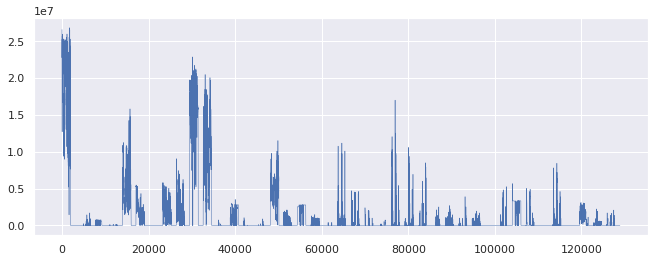

In [72]:
df_it['ALLOCATION'].plot(linewidth=0.5);

## Prediction for the IT department
You need to predict the CAPA_QUANTITY only
* This time use POINTTYPE=2 only (“2” stands for industry customers)
* Pls create a training set reaching from 01 Jan 2016 – 31 Dec 2018 and test set reaching from 01 Jan 2019 – 31 Dec 2019
* As prediction algorithms you should be considering multivariate linear and non-linear regression and Support Vector Machines (SVM). All these algorithms should be part of the ML tools. Otherwise, take an algorithm out of your choice.
* You need to find the best combination (= combination with best prediction quality) for all possible input factor combinations
* Pls consider that the input factors themselves need to be predicted when predicting the result for 2021.
* Prediction period: 03 June 2020 - 31.12.2021
* Pls remember you need to predict 365 days for every station (guess you have 10 stations, then your result table will be containing 3650 records)

In [12]:
url_quantityPrediction_quantities = 'https://github.com/enricsanz-dxc/sesdpw2g4/blob/main/files/quantityPrediction_quantities.csv?raw=true'
url_quantityPrediction_stockPrices = 'https://github.com/enricsanz-dxc/sesdpw2g4/raw/main/files/quantityPrediction_stockPrices.csv?raw=true'
url_quantityPrediction_temperatures = 'https://github.com/enricsanz-dxc/sesdpw2g4/raw/main/files/quantityPrediction_temperatures.csv?raw=true'


df_qp_q = pd.read_csv(url_quantityPrediction_quantities)
df_qd_sp = pd.read_csv(url_quantityPrediction_stockPrices)
df_qs_t = pd.read_csv(url_quantityPrediction_temperatures)



In [13]:
df_qd_sp.describe()


,stockdate,ncg,powerpool,ttf,ztp,powerpool_uk_ocm
count,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.017969e+07,14735.971734,14651.922078,18012.757066,16819.375859,14651.922078
std,1.268308e+04,9264.787289,9199.220152,8314.179722,9402.260896,9199.220152
min,2.016010e+07,23.000000,21.000000,25.000000,2.000000,21.000000
25%,2.017082e+07,2561.000000,2554.000000,15053.000000,12201.000000,2554.000000
50%,2.018072e+07,18301.000000,18032.000000,20698.000000,20549.000000,18032.000000
75%,2.019061e+07,21867.000000,21589.000000,23902.000000,23885.000000,21589.000000
max,2.020050e+07,29129.000000,29532.000000,39997.000000,39005.000000,29532.000000


In [14]:
df_qp_q.describe()

,PTYPE,BUSINESSDATE,CAPA_QUANTITY
count,310687.0,3.106870e+05,3.106870e+05
mean,2.0,2.017927e+07,6.889386e+06
std,0.0,1.287758e+04,2.712499e+07
min,2.0,2.016010e+07,0.000000e+00
25%,2.0,2.017080e+07,7.200000e+04
50%,2.0,2.018063e+07,4.800000e+05
75%,2.0,2.019060e+07,1.920024e+06
max,2.0,2.020050e+07,3.486713e+08


In [15]:
df_qs_t.describe()

,tempdate,temp_de,temp_it,temp_at,temp_pl,temp_ru,temp_ukr
count,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.017969e+07,10.493965,6.977082,16.613751,9.882353,12.051872,9.837357
std,1.268308e+04,6.941726,10.296518,6.351197,8.534717,7.951452,10.149430
min,2.016010e+07,-13.500000,-23.400000,-0.100000,-18.400000,-11.700000,-22.400000
25%,2.017082e+07,5.000000,0.000000,11.600000,3.900000,5.800000,2.200000
50%,2.018072e+07,10.400000,6.700000,16.100000,9.900000,12.100000,10.600000
75%,2.019061e+07,15.700000,15.700000,22.300000,16.300000,18.000000,18.300000
max,2.020050e+07,28.100000,26.500000,29.000000,29.400000,30.400000,29.100000
